In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#1. Прочитайте csv файл (метод read_csv) та виведіть перших 5 рядків
data = pd.read_csv("Housing .csv", encoding='latin1')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
#2. Зробіть новий датасет, який містить тільки ці стовпчики: columns = ['price', 'area', 'bedrooms', 'bathrooms'] 

data1 = data.copy()
columns = ['price', 'area', 'bedrooms', 'bathrooms']

data1 = data1[columns]
data1.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [3]:
#3. Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних. 
data_miss = data1.isna().sum()/len(data1)*100
print(f"The amount of gaps in each column:\n", data_miss)

The amount of gaps in each column:
 price        0.0
area         0.0
bedrooms     0.0
bathrooms    0.0
dtype: float64


In [4]:
#4. Нормалізуйте дані перед подальшим використанням. 
scaler = StandardScaler()
data1[['area', 'bedrooms', 'bathrooms']] = scaler.fit_transform(data1[['area', 'bedrooms', 'bathrooms']])

In [5]:
#5. Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі. 
#6. Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) 
#   та цільову змінну (ціну на будинок). 

X = data[['area', 'bedrooms', 'bathrooms']].values
y = data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [6]:
#7. Побудуйте модель лінійної регресії та навчіть її на навчальних даних. 
model_lin = LinearRegression()

model_lin.fit(X_train, y_train)

LinearRegression()

In [7]:
#8. Оцініть якість моделі на тестових даних, використовуючи показники, такі як середньоквадратична помилка (RMSE) 
#   та коефіцієнт детермінації. Потім застосуйте крос-валідацію для підвищення якості моделі. Порівняйте результати.

#Кросс-валідація
cv = cross_val_score(model_lin, X_train, y_train, cv=8)

#Прогнозовані ціни на будинки для тестового набору даних (9 завдання)
y_predict = model_lin.predict(X_test)

#Оцінка якості моделі
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
cod = r2_score(y_test, y_predict)


print(f"Середньоквадратична помилка (RMSA): {rmse}")
print(f"Коефіцієнт детермінації: {cod}")

print (f"Коефіцієнт детермінації з кросс-валідацією:", np.mean(cv))

Середньоквадратична помилка (RMSA): 1525447.8308762168
Коефіцієнт детермінації: 0.4317973605682526
Коефіцієнт детермінації з кросс-валідацією: 0.4675204018841266


In [8]:
#Частина 2 (8). Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі, використовуючи формулу 
#для спрощеного аналітичного рішення лінійної регресії. 
analytical_solution = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
coef_of_interception = np.linalg.inv(analytical_solution.T.dot(analytical_solution)).dot(analytical_solution.T).dot(y_train)
analytical_interception = coef_of_interception[0]
coef_for_attributes = coef_of_interception[1:]

print(f"Аналітично визначені коефіцієнти лінійної регресії:")
print(f"Interception:", analytical_interception.round(5))
print(f"Coefficients for attributes: ", coef_for_attributes.round(5))

Аналітично визначені коефіцієнти лінійної регресії:
Interception: 11107.47651
Coefficients for attributes:  [3.47237870e+02 3.72933511e+05 1.42498679e+06]


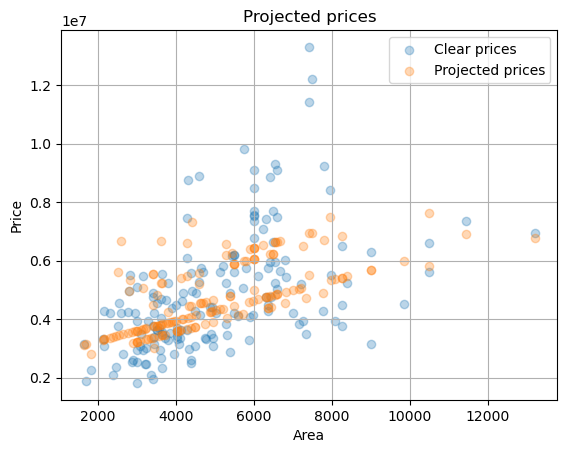

In [9]:
#Частина 3 (9). Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і 
#лінійною регресійною моделлю. 
plt.scatter(X_test[:, 0], y_test, label='Clear prices', alpha=0.3)
plt.scatter(X_test[:, 0], y_predict, label='Projected prices', alpha=0.3)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Projected prices')
plt.grid()
plt.legend()
plt.show()

In [10]:
#Частина 3 (10). Порівняйте отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами 
#та оцініть, наскільки схожі вони. 
print(f"Порівняння параметрів:")
print(f"Interception: ", model_lin.intercept_.round(5))
print(f"Coefficients for attributes: ", model_lin.coef_.round(5))

Порівняння параметрів:
Interception:  11107.47651
Coefficients for attributes:  [3.47237870e+02 3.72933511e+05 1.42498679e+06]


Параметри лінійної регресії та аналітичні результати ідентичні.

#Частина 3 (11). Зробіть висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі 
#вказаних атрибутів та порівняння з аналітичним рішенням. 

Лінайна регресія є досить ефективною у прогнозуванні цін на будинок, за умови вибору атребутів та якості даних. Так як було вказано правильні атрибути та їх достатню кількість, це посприяло усуненню перенавчання та недонавчання моделі. Як наслідок аналітичні результати співпали з отриманими коефіцієнтами лінійної регресії.

Висновок: на практичній роботі я навчився нормалізувати дані, проводити попередній аналіз, будувати модель лінійної регресії, оцінювати якість моделі на тестових даних, розподіляти та візуалізовувати дані.    
